## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  44.909193   810.092539  0.996313   6.137950  1.531525
1   7.956860   929.084955  0.747262   6.889152  1.627569
2  91.984000   340.741769  0.311538   2.304569  0.860409
3  94.006419   292.943367  0.581387   4.919970  1.009052
4   5.947054  1349.546539  0.141090  10.521741  1.784941


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9337201	total: 57.2ms	remaining: 57.2s
1:	learn: 0.9268398	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9194668	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9108324	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9020360	total: 59.2ms	remaining: 11.8s
5:	learn: 0.8960969	total: 59.7ms	remaining: 9.89s
6:	learn: 0.8876581	total: 60.4ms	remaining: 8.56s
7:	learn: 0.8781210	total: 61ms	remaining: 7.57s
8:	learn: 0.8698903	total: 61.5ms	remaining: 6.78s
9:	learn: 0.8628872	total: 62ms	remaining: 6.14s
10:	learn: 0.8557626	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8470354	total: 63ms	remaining: 5.18s
12:	learn: 0.8386869	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8310405	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8218879	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8156364	total: 64.8ms	remaining: 3.99s
16:	learn: 0.8073595	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8015923	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7958317	total: 66.2ms	remaining: 3.42s

107:	learn: 0.3975839	total: 108ms	remaining: 893ms
108:	learn: 0.3951503	total: 109ms	remaining: 889ms
109:	learn: 0.3922213	total: 109ms	remaining: 884ms
110:	learn: 0.3893473	total: 110ms	remaining: 879ms
111:	learn: 0.3864050	total: 110ms	remaining: 874ms
112:	learn: 0.3841087	total: 111ms	remaining: 870ms
113:	learn: 0.3818091	total: 111ms	remaining: 866ms
114:	learn: 0.3796105	total: 112ms	remaining: 861ms
115:	learn: 0.3777696	total: 113ms	remaining: 857ms
116:	learn: 0.3757173	total: 113ms	remaining: 852ms
117:	learn: 0.3735813	total: 113ms	remaining: 848ms
118:	learn: 0.3713069	total: 114ms	remaining: 843ms
119:	learn: 0.3691968	total: 114ms	remaining: 839ms
120:	learn: 0.3668266	total: 115ms	remaining: 835ms
121:	learn: 0.3646437	total: 115ms	remaining: 831ms
122:	learn: 0.3625043	total: 116ms	remaining: 826ms
123:	learn: 0.3602945	total: 116ms	remaining: 822ms
124:	learn: 0.3580711	total: 117ms	remaining: 818ms
125:	learn: 0.3559430	total: 117ms	remaining: 814ms
126:	learn: 

269:	learn: 0.1850578	total: 187ms	remaining: 504ms
270:	learn: 0.1846663	total: 187ms	remaining: 503ms
271:	learn: 0.1839132	total: 187ms	remaining: 502ms
272:	learn: 0.1830175	total: 188ms	remaining: 500ms
273:	learn: 0.1820907	total: 188ms	remaining: 499ms
274:	learn: 0.1813924	total: 189ms	remaining: 498ms
275:	learn: 0.1807696	total: 189ms	remaining: 497ms
276:	learn: 0.1799457	total: 190ms	remaining: 496ms
277:	learn: 0.1794567	total: 190ms	remaining: 494ms
278:	learn: 0.1788303	total: 191ms	remaining: 493ms
279:	learn: 0.1782261	total: 191ms	remaining: 492ms
280:	learn: 0.1774834	total: 192ms	remaining: 491ms
281:	learn: 0.1766908	total: 192ms	remaining: 490ms
282:	learn: 0.1759537	total: 193ms	remaining: 488ms
283:	learn: 0.1756272	total: 193ms	remaining: 487ms
284:	learn: 0.1749620	total: 194ms	remaining: 486ms
285:	learn: 0.1744084	total: 194ms	remaining: 485ms
286:	learn: 0.1739697	total: 195ms	remaining: 484ms
287:	learn: 0.1736203	total: 195ms	remaining: 483ms
288:	learn: 

493:	learn: 0.1125988	total: 292ms	remaining: 299ms
494:	learn: 0.1123302	total: 292ms	remaining: 298ms
495:	learn: 0.1118072	total: 293ms	remaining: 297ms
496:	learn: 0.1112942	total: 293ms	remaining: 297ms
497:	learn: 0.1107473	total: 294ms	remaining: 296ms
498:	learn: 0.1104945	total: 294ms	remaining: 295ms
499:	learn: 0.1102073	total: 295ms	remaining: 295ms
500:	learn: 0.1096636	total: 295ms	remaining: 294ms
501:	learn: 0.1091303	total: 296ms	remaining: 293ms
502:	learn: 0.1090002	total: 296ms	remaining: 293ms
503:	learn: 0.1084997	total: 297ms	remaining: 292ms
504:	learn: 0.1082552	total: 297ms	remaining: 291ms
505:	learn: 0.1077367	total: 298ms	remaining: 291ms
506:	learn: 0.1072182	total: 298ms	remaining: 290ms
507:	learn: 0.1069802	total: 299ms	remaining: 289ms
508:	learn: 0.1064722	total: 299ms	remaining: 289ms
509:	learn: 0.1063449	total: 300ms	remaining: 288ms
510:	learn: 0.1062191	total: 300ms	remaining: 288ms
511:	learn: 0.1058167	total: 301ms	remaining: 287ms
512:	learn: 

653:	learn: 0.0687691	total: 370ms	remaining: 196ms
654:	learn: 0.0686376	total: 370ms	remaining: 195ms
655:	learn: 0.0685083	total: 371ms	remaining: 194ms
656:	learn: 0.0683325	total: 371ms	remaining: 194ms
657:	learn: 0.0681018	total: 372ms	remaining: 193ms
658:	learn: 0.0680080	total: 372ms	remaining: 193ms
659:	learn: 0.0678398	total: 373ms	remaining: 192ms
660:	learn: 0.0676128	total: 373ms	remaining: 191ms
661:	learn: 0.0674134	total: 374ms	remaining: 191ms
662:	learn: 0.0673213	total: 374ms	remaining: 190ms
663:	learn: 0.0671560	total: 374ms	remaining: 189ms
664:	learn: 0.0670256	total: 375ms	remaining: 189ms
665:	learn: 0.0668636	total: 376ms	remaining: 188ms
666:	learn: 0.0666402	total: 376ms	remaining: 188ms
667:	learn: 0.0665365	total: 377ms	remaining: 187ms
668:	learn: 0.0663977	total: 377ms	remaining: 187ms
669:	learn: 0.0661793	total: 378ms	remaining: 186ms
670:	learn: 0.0660772	total: 378ms	remaining: 185ms
671:	learn: 0.0659867	total: 378ms	remaining: 185ms
672:	learn: 

877:	learn: 0.0434523	total: 474ms	remaining: 65.9ms
878:	learn: 0.0433847	total: 475ms	remaining: 65.4ms
879:	learn: 0.0432088	total: 476ms	remaining: 64.9ms
880:	learn: 0.0430861	total: 476ms	remaining: 64.3ms
881:	learn: 0.0430195	total: 476ms	remaining: 63.7ms
882:	learn: 0.0428834	total: 477ms	remaining: 63.2ms
883:	learn: 0.0428178	total: 477ms	remaining: 62.6ms
884:	learn: 0.0427734	total: 478ms	remaining: 62.1ms
885:	learn: 0.0426228	total: 478ms	remaining: 61.6ms
886:	learn: 0.0425036	total: 479ms	remaining: 61ms
887:	learn: 0.0424089	total: 479ms	remaining: 60.4ms
888:	learn: 0.0423366	total: 480ms	remaining: 59.9ms
889:	learn: 0.0421627	total: 480ms	remaining: 59.3ms
890:	learn: 0.0419766	total: 481ms	remaining: 58.8ms
891:	learn: 0.0417753	total: 481ms	remaining: 58.3ms
892:	learn: 0.0416093	total: 482ms	remaining: 57.7ms
893:	learn: 0.0414288	total: 482ms	remaining: 57.2ms
894:	learn: 0.0413105	total: 483ms	remaining: 56.6ms
895:	learn: 0.0411811	total: 483ms	remaining: 56

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

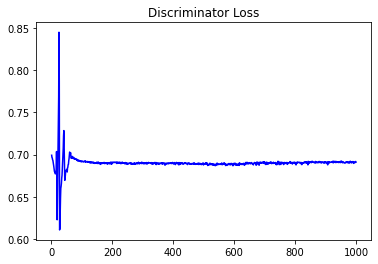

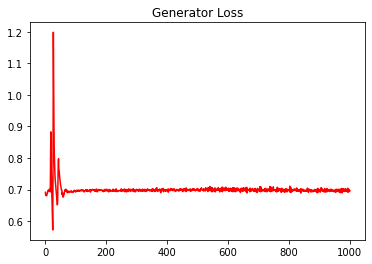

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16748529893707326


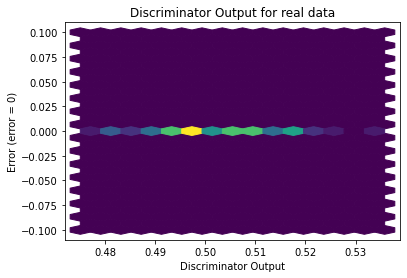

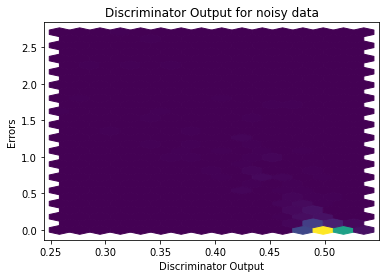

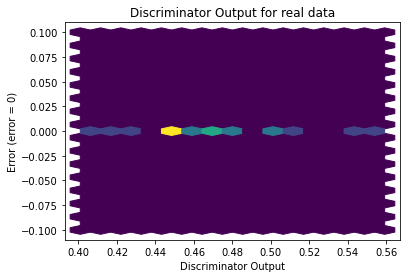

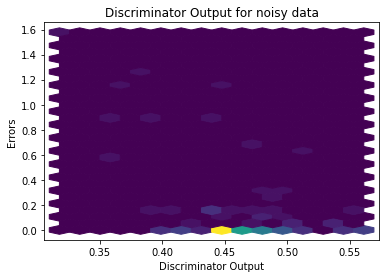

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


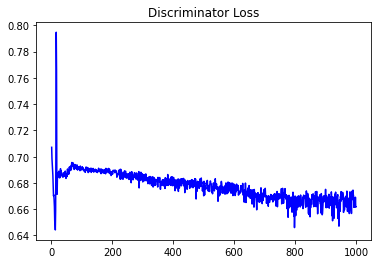

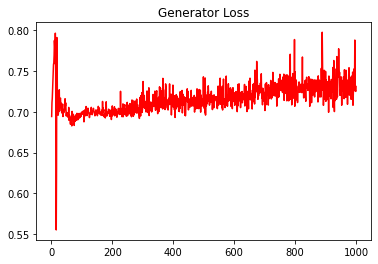

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14452489263536902


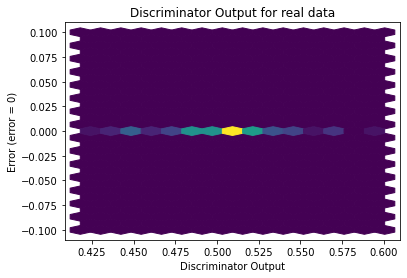

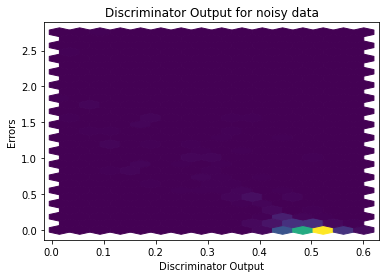

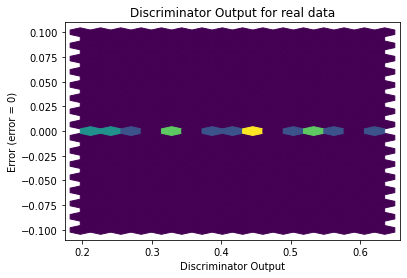

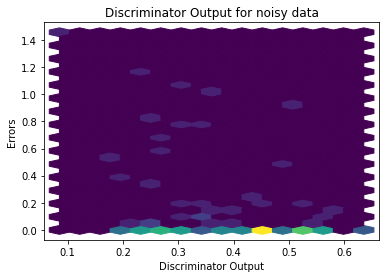

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1474]], requires_grad=True)
